<a href="https://colab.research.google.com/github/dani-jimlar/XAI_AIPI_590/blob/main/XAI_Assignment_4_imodels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AIPI 590 - XAI | Assignment 4

Interpretable ML

Daniela Jiménez Lara

In [1]:
pip install imodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.0/243.0 kB 2.4 MB/s eta 0:00:00


From the list of supported models available in the README (link above), choose three algorithms to demo on a dataset of your choice.



In addition to a demonstration for each of your chosen algorithms, you should provide an explanation of the method via a visual. This visual can be a block diagram, a slide, or anything of your choosing. It should represent the method in a way that your fellow students would be able to understand the algorithm visually.



The visuals can be included in your GitHub submission OR can be submitted in Canvas.

Rubric
Notebook (30 points)

Notebook is well documented and includes details and references to the dataset and models used
Three models are chosen from imodels and implemented using the imodels library
Code implementation is correct
Code implementation is clear and well documented


Visuals (30 points, 10 points per visual)

Rubric for each visual:

Visual is high resolution and can be viewed
Visual clearly explains the algorithm being explained
Visual is intentional and creative

## Data: PAES- Chilean Higher Education Admission Test (Prueba de acceso a la Educación Superior)

The PAES is the most recent selection test to access the Chilean higher education system. It favors the application and understanding of knowledge instead of memorization; and aims to close the existing gap between private and public school students' scores. The data gives the scores on Mathematics and Reading Competency as well as socioeconomic variables.

In [2]:
""" Prepare data """

# load data

import pandas as pd
path_score='/content/drive/MyDrive/XAI_2/asiign_4/A_INSCRITOS_PUNTAJES_2023_PAES_PUB_MRUN.csv'
test_score = pd.read_csv(path_score, delimiter=";", low_memory=False)

score_math=test_score[['MRUN', 'MATE1_REG_ACTUAL', 'ANYO_PROCESO', 'COD_SEXO', 'FECHA_NACIMIENTO', 'RBD', 'CODIGO_ENS',
                       'LOCAL_EDUCACIONAL', 'UNIDAD_EDUCATIVA', 'NOMBRE_UNIDAD_EDUC', 'RAMA_EDUCACIONAL', 'DEPENDENCIA',
                       'CODIGO_REGION_EGRESO', 'NOMBRE_REGION_EGRESO', 'CODIGO_PROVINCIA_EGRESO', 'NOMBRE_PROVINCIA_EGRESO',
                       'CODIGO_COMUNA_EGRESO', 'NOMBRE_COMUNA_EGRESO', 'ANYO_DE_EGRESO', 'PROMEDIO_NOTAS', 'PTJE_NEM']]
score_read=test_score[['MRUN', 'CLEC_REG_ACTUAL']]


path_socio='/content/drive/MyDrive/XAI_2/asiign_4/B_SOCIOECONOMICO_DOMICILIO_2023_PAES_PUB_MRUN.csv'
socioeconomic = pd.read_csv(path_socio, delimiter=";")

data = pd.merge(score_math, socioeconomic, how="inner", on=["MRUN",'ANYO_PROCESO','FECHA_NACIMIENTO'])
data = pd.merge(score_read, data, how="inner", on="MRUN")

In [3]:
# Drop nas from target vaiables and drop uneeded columns
data = data[data["MATE1_REG_ACTUAL"] != " "]
data = data[data["CLEC_REG_ACTUAL"] != " "]
data = data[data["DEPENDENCIA"] != " "]
data = data[data["DEPENDENCIA"] != " "]

data["MATE1_REG_ACTUAL"] = data["MATE1_REG_ACTUAL"].astype(int)
data["CLEC_REG_ACTUAL"] = data["CLEC_REG_ACTUAL"].astype(int)

data = data[data["MATE1_REG_ACTUAL"] > 0]
data = data[data["CLEC_REG_ACTUAL"] > 0]
data = data.drop(columns=data.filter(like='CODIGO').columns)


In [4]:
# map and tranform catagorical variables, rename columns

dependency_mapping = {
    "1": "Public School",
    "2": "Public School",
    "3": "Private subsidized School",
    "4": "Private non-subsidized School",
    "5": "Delegated Administration School",
    "6": "Public School",
}

gender_mapping = {
    1: "Male",
    2: "Female"
}

razon_paes={
    1:' Porque busco mejorar alguno(s) de mis resultados pasados.'
    ,2: 'Para estudiar una carrera técnica'
    ,3: 'Para estudiar una carrera universitaria'
    ,4: 'Para ingresar a la PDI, Fuerzas armadas'
    ,5: 'Por otra razón'
    ,6: 'Porque no pude rendir alguna aplicación pasada '
    ,7: 'Porque soy profesional de la educación y deseo conocer el instrumento'
    ,8: 'Porque me obligaron a inscribirme en el colegio'
    ,9: 'Prefiero no responder'
}

uso_espacio_mapping={
     0: 'No aplica'
    ,1: 'Menos de 1 hora a la semana '
    ,2: 'Entre 1 y 3 horas a la semana'
    ,3: 'Entre 3 y 5 horas a la semana'
    ,4: 'Más de 5 horas a la semana'
}

tranquilidad_colegio_mapping={
    1: 'Nunca'
    ,2: 'Rara vez'
    ,3: 'A menudo'
    ,4: 'Casi siempre'
    ,5: 'Siempre'
    ,9: 'Prefiero no responder'
}

data["DEPENDENCIA"] = data["DEPENDENCIA"].replace(dependency_mapping)

data["SEXO"] = data["SEXO"].replace(gender_mapping)
data["RAZON_PRINCIPAL_PAES"] = data["RAZON_PRINCIPAL_PAES"].replace(razon_paes)

data["TRANQUILIDAD_COLEGIO"]= data["TRANQUILIDAD_COLEGIO"].replace(tranquilidad_colegio_mapping)
data["TRABAJO_GRUPO_COLEGIO"] = data["TRABAJO_GRUPO_COLEGIO"].replace(tranquilidad_colegio_mapping)


data.rename(columns={'ESPACIO_1':'Library',}, inplace=True)
data.rename(columns={'ESPACIO_2':'Study_rooms',}, inplace=True)
data.rename(columns={'ESPACIO_3':'Science_lab',}, inplace=True)
data.rename(columns={'ESPACIO_4':'Art_room',}, inplace=True)
data.rename(columns={'ESPACIO_5':'Kitchen',}, inplace=True)
data.rename(columns={'ESPACIO_6':'Tech_lab',}, inplace=True)
data.rename(columns={'ESPACIO_7':'PE_Gym',}, inplace=True)
data.rename(columns={'ESPACIO_8':'Computer_lab',}, inplace=True)


data.rename(columns={'DISPOSITIVO_1':'Computer',}, inplace=True)
data.rename(columns={'DISPOSITIVO_2':'Tablet',}, inplace=True)
data.rename(columns={'DISPOSITIVO_3':'SmartPhone',}, inplace=True)
data.rename(columns={'DISPOSITIVO_4':'No tech devices',}, inplace=True)
data.drop(['DISPOSITIVO_5','ESPACIO_9','FECHA_NACIMIENTO','MRUN','CLEC_REG_ACTUAL','COD_SEXO'], axis=1, inplace=True)
data.drop(columns=data.filter(like='USO_').columns, inplace=True)

data.shape

(230314, 34)

In [5]:
#Use patsy for matrix
import patsy

formula = 'MATE1_REG_ACTUAL ~  + C(DEPENDENCIA) + ' \
          'C(NOMBRE_REGION_EGRESO) + C(NOMBRE_PROVINCIA_EGRESO) + C(NOMBRE_COMUNA_EGRESO) + ' \
          'C(ANYO_DE_EGRESO) + C(PROMEDIO_NOTAS) + PTJE_NEM + C(NOMBRE_COMUNA_DOMICILIO) + SEXO + ' \
          'INGRESO_PERCAPITA_GRUPO_FA + C(RAZON_PRINCIPAL_PAES) +  ' \
          ' C(HOGAR_CONEXION_INTERNET) + CONEXION_INSUFICIENTE + C(Library) + ' \
          'C(Study_rooms) + C(Science_lab) + C(Art_room) + C(Kitchen) + C(Tech_lab) + C(PE_Gym) + ' \
          'C(Computer_lab) + C(TRANQUILIDAD_COLEGIO) + ' \
          'C(TRABAJO_GRUPO_COLEGIO)'

y, X = patsy.dmatrices(formula, data, return_type='dataframe')

X_a = X.to_numpy()
y_a= y.to_numpy().ravel()
features= X.columns

## Greedy Tree Regressor
This decision tree shows us what are the features that matter most and what is the expected exam score if these features are met.

In [6]:
from sklearn.model_selection import train_test_split
from imodels import  GreedyTreeRegressor # import any imodels model here

# prepare data (a sample clinical dataset)
X_train, X_test, y_train, y_test = train_test_split(
    X_a, y_a, random_state=42)

# Greedy Tree
model = GreedyTreeRegressor(max_leaf_nodes=6)
model.fit(X_train, y_train, feature_names=features)
preds = model.predict(X_test)
print(model)

GreedyTree:
|--- PTJE_NEM <= 833.50
|   |--- C(DEPENDENCIA)[T.Private non-subsidized School] <= 0.50
|   |   |--- SEXO[T.Male] <= 0.50
|   |   |   |--- value: [502.98]
|   |   |--- SEXO[T.Male] >  0.50
|   |   |   |--- value: [543.70]
|   |--- C(DEPENDENCIA)[T.Private non-subsidized School] >  0.50
|   |   |--- value: [623.97]
|--- PTJE_NEM >  833.50
|   |--- C(DEPENDENCIA)[T.Private non-subsidized School] <= 0.50
|   |   |--- SEXO[T.Male] <= 0.50
|   |   |   |--- value: [603.12]
|   |   |--- SEXO[T.Male] >  0.50
|   |   |   |--- value: [681.84]
|   |--- C(DEPENDENCIA)[T.Private non-subsidized School] >  0.50
|   |   |--- value: [792.29]



## Rulefit Classifier
To fit this model, our target variable will be transformed to a binary output to make the computing time efficient. We are going to create a dummy for scores higher or equal to the third quartile: 609, as the distribution of the score is as follows:

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


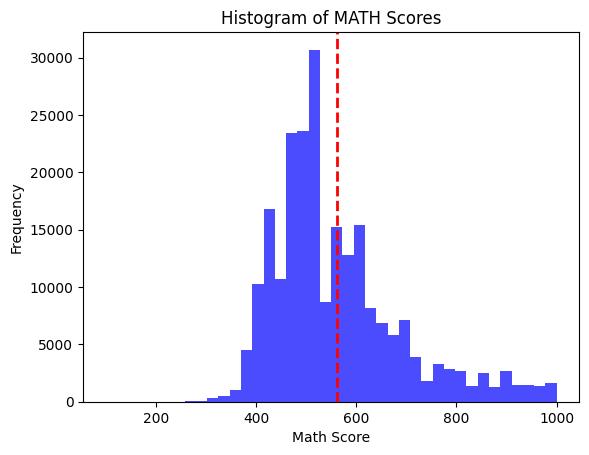

In [7]:
import matplotlib.pyplot as plt
mean_value = data["MATE1_REG_ACTUAL"].mean()

data["MATE1_REG_ACTUAL"].plot(kind='hist', bins=40, color='blue', alpha=0.7)
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')

plt.title('Histogram of MATH Scores')
plt.xlabel('Math Score')
plt.ylabel('Frequency')

# Display the plot
plt.show()


In [8]:
import numpy as np

y_test_b = np.where(y_test >= 609, 1, 0)
y_train_b = np.where(y_train >= 609, 1, 0)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Implement model
The model will discriminate among all the decision rules with a linar model wiht lasso regularization. This will  give us the final list of rules that best predict if our test score is larger or smaller than 609. We can then interpret the coefficients.

In [14]:
from imodels import RuleFitClassifier

model_t = RuleFitClassifier(n_estimators=50, tree_size=4, max_rules=30)  # initialize a tree model and specify only 4 leaf nodes
model_t.fit(X_train, y_train_b, feature_names=features)   # fit model
preds_t = model_t.predict(X_test) # discrete predictions: shape is (n_test, 1)
model_t.visualize()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,rule,coef
3,C(DEPENDENCIA)[T.Public School],-0.21
452,C(ANYO_DE_EGRESO)[T.2022],-0.43
939,SEXO[T.Male],0.24
951,C(Study_rooms)[T.S],-0.18
952,C(Science_lab)[T.S],0.14
956,C(PE_Gym)[T.S],0.07
966,PTJE_NEM,0.00
65,C(NOMBRE_PROVINCIA_EGRESO)[T.SANTIAGO],0.11
987,C(DEPENDENCIA)[T.Private non-subsidized School] <= 0.5,-0.29
981,PTJE_NEM <= 850.5,-0.07


### Coefficient visualization



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


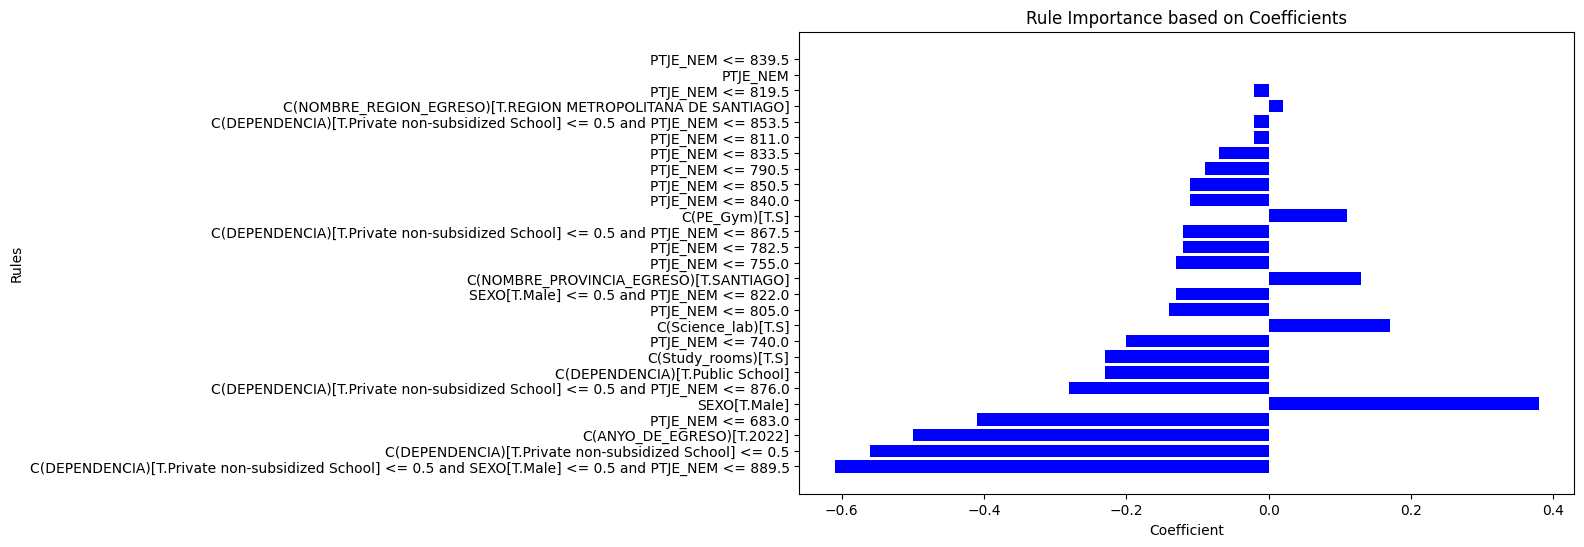

In [12]:
import matplotlib.pyplot as plt
import pandas as pd


df=model_t.visualize()

# Sort by the absolute value of the coefficients
df["Abs_Coefficient"] = df["coef"].abs()
df = df.sort_values(by="Abs_Coefficient", ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(df["rule"], df["coef"], color="blue")
plt.title("Rule Importance based on Coefficients")
plt.xlabel("Coefficient")
plt.ylabel("Rules")
plt.show()


## Boosted Rule Classifier

In [ ]:
from imodels import BoostedRulesClassifier
from sklearn.tree import DecisionTreeClassifier

model_b = BoostedRulesClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=100, random_state=42)
model_b.fit(X_train, y_train)

rules = model_b.estimators_


### Print the decision trees

In [21]:
from sklearn.tree import export_text
X_train_b = pd.DataFrame(X_train, columns=features)  # Replace 'features' with your actual feature names

# Function to extract rules from the decision trees
def print_tree_rules(trees):
    for i, tree in enumerate(trees):
        print(f"Rules for Tree {i + 1}:")
        print(export_text(tree, feature_names=X_train_b.columns.tolist()))
        print("\n" + "-" * 50 + "\n")

# Call the function with your model's estimators
print_tree_rules(rules)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Rules for Tree 1:
|--- PTJE_NEM <= 792.50
|   |--- class: 19.0
|--- PTJE_NEM >  792.50
|   |--- class: 23.0


--------------------------------------------------

Rules for Tree 2:
|--- C(DEPENDENCIA)[T.Private non-subsidized School] <= 0.50
|   |--- class: 3.0
|--- C(DEPENDENCIA)[T.Private non-subsidized School] >  0.50
|   |--- class: 59.0


--------------------------------------------------

Rules for Tree 3:
|--- C(PROMEDIO_NOTAS)[T.5,97] <= 0.50
|   |--- class: 35.0
|--- C(PROMEDIO_NOTAS)[T.5,97] >  0.50
|   |--- class: 2.0


--------------------------------------------------

Rules for Tree 4:
|--- C(NOMBRE_COMUNA_EGRESO)[T.PIRQUE] <= 0.50
|   |--- class: 10.0
|--- C(NOMBRE_COMUNA_EGRESO)[T.PIRQUE] >  0.50
|   |--- class: 2.0


--------------------------------------------------

Rules for Tree 5:
|--- C(NOMBRE_COMUNA_EGRESO)[T.CALDERA] <= 0.50
|   |--- class: 36.0
|--- C(NOMBRE_COMUNA_EGRESO)[T.CALDERA] >  0.50
|   |--- class: 2.0


------------------------------------------------

### Print the trees as rule statements

In [46]:

X_train_b = pd.DataFrame(X_train, columns=features)  # Replace 'features' with your actual feature names

def extract_rule(tree, feature_names):
    left = tree.tree_.children_left[0]
    right = tree.tree_.children_right[0]
    feature = feature_names[tree.tree_.feature[0]]
    threshold = tree.tree_.threshold[0]

    if tree.tree_.value[left][0][1] > tree.tree_.value[right][0][1]:
        return f"If {feature} <= {threshold:.2f} then 1, else 0"
    else:
        return f"If {feature} > {threshold:.2f} then 1, else 0"

for i, tree in enumerate(rules):
    rule = extract_rule(tree, list(X_train_b.columns))
    print(f"Rule {i + 1}: {rule}")

Rule 1: If PTJE_NEM <= 792.50 then 1, else 0
Rule 2: If C(DEPENDENCIA)[T.Private non-subsidized School] <= 0.50 then 1, else 0
Rule 3: If C(PROMEDIO_NOTAS)[T.5,97] <= 0.50 then 1, else 0
Rule 4: If C(NOMBRE_COMUNA_EGRESO)[T.PIRQUE] <= 0.50 then 1, else 0
Rule 5: If C(NOMBRE_COMUNA_EGRESO)[T.CALDERA] <= 0.50 then 1, else 0
Rule 6: If C(NOMBRE_COMUNA_DOMICILIO)[T.MELIPILLA] <= 0.50 then 1, else 0
Rule 7: If C(NOMBRE_COMUNA_DOMICILIO)[T.LOS ANGELES] <= 0.50 then 1, else 0
Rule 8: If C(NOMBRE_COMUNA_DOMICILIO)[T.LO BARNECHEA] <= 0.50 then 1, else 0
Rule 9: If C(NOMBRE_COMUNA_DOMICILIO)[T.MELIPILLA] <= 0.50 then 1, else 0
Rule 10: If C(NOMBRE_COMUNA_DOMICILIO)[T.LOS ANGELES] <= 0.50 then 1, else 0
Rule 11: If C(NOMBRE_COMUNA_EGRESO)[T.PIRQUE] <= 0.50 then 1, else 0
Rule 12: If C(NOMBRE_COMUNA_DOMICILIO)[T.LO BARNECHEA] <= 0.50 then 1, else 0
Rule 13: If C(NOMBRE_COMUNA_DOMICILIO)[T.MELIPILLA] <= 0.50 then 1, else 0
Rule 14: If C(NOMBRE_COMUNA_EGRESO)[T.CALDERA] <= 0.50 then 1, else 0
Rule 1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Model Visuals
![Greedy Tree](https://raw.githubusercontent.com/dani-jimlar/XAI_AIPI_590/main/greedy_tree.jpg)

![Class](https://raw.githubusercontent.com/dani-jimlar/XAI_AIPI_590/main/rule_fit.jpg)
![boosted_tree](https://raw.githubusercontent.com/dani-jimlar/XAI_AIPI_590/main/boosted_tree.jpg)

